# Using merge_ordered()

This method can merge time-series and other ordered data.

|merge() method|merge_ordered() method|
|:-|:-|
|Column(s) to join: on, left_on, right_on| Column(s) to join: on, left_on, right_on|
|Type of join: how(left, right, inner(default), outer){{@}}|Type of join: how(left, right, inner, outer(default))|
|Overlapping column names: suffixes| Overlapping column names: suffixes|
|Calling the method: df1.merge(df2)|Calling the method: d.merge_ordered(df1, df2)|  

import pandas as pd
pd.merge_ordered(appl, mcd, on='date', suffixes=('_aapl','_mcd')

# Forward Filling
If there isn't a value, use a technique called forward filling. It will interpolate missing data by filling the missing values with the previous value.

pd.merge_ordered(appl, mcd, on='date',  
                suffixes=('_aapl','_mcd'),  
                fill_method='ffill')  

Use the merge_ordered method instead of the regular merge method when you are working with order or time-series data.

# Correlation between GDP and S&P500
In this exercise, you want to analyze stock returns from the S&P 500. You believe there may be a relationship between the returns of the S&P 500 and the GDP of the US. Merge the different datasets together to compute the correlation.

Two tables have been provided for you, named sp500, and gdp. As always, pandas has been imported for you as pd.  

Use merge_ordered() to merge gdp and sp500 using a left join on year and date. Save the results as gdp_sp500.
Print gdp_sp500 and look at the returns for the year 2018.  

Use merge_ordered(), again similar to before, to merge gdp and sp500 use the function's ability to interpolate missing data to forward fill the missing value for returns, assigning this table to the variable gdp_sp500.  

Subset the gdp_sp500 table, select the gdp and returns columns, and save as gdp_returns.
Print the correlation matrix of the gdp_returns table.  

In [53]:
import pandas as pd
sp500 = pd.read_csv('S&P500.csv')
#print(sp500[:5])
gdp = pd.read_csv('gdp.csv')
#print(gdp[:5])

In [54]:
# Use merge_ordered() to merge gdp and sp500 on year and date
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on='year', right_on='Date', 
                             how='left')

# Print gdp_sp500
print(gdp_sp500)

# Use merge_ordered() to merge gdp and sp500, interpolate missing value
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on = 'year', right_on = 'Date', how = 'left', fill_method='ffill')

# Subset the gdp and returns columns
gdp_returns = gdp_sp500[["gdp", "Returns"]]

# Print gdp_returns correlation
print (gdp_returns.corr())

  country code  year           gdp    Date  Returns
0          USA  2010  1.500000e+13  2010.0    12.78
1          USA  2011  1.550000e+13  2011.0     0.00
2          USA  2012  1.620000e+13  2012.0    13.41
3          USA  2012  1.620000e+13  2012.0    13.41
4          USA  2013  1.680000e+13  2013.0    29.60
5          USA  2014  1.750000e+13  2014.0    11.39
6          USA  2015  1.820000e+13  2015.0    -0.73
7          USA  2016  1.870000e+13  2016.0     9.54
8          USA  2017  1.950000e+13  2017.0    19.42
9          USA  2018  2.050000e+13     NaN      NaN
              gdp   Returns
gdp      1.000000  0.220321
Returns  0.220321  1.000000


the correlation of 0.21 between the GDP and S&P500 is low to moderate at best. You may want to find another predictor if you plan to play in the stock market.

# Phillips curve using merge_ordered()
There is an economic theory developed by A. W. Phillips which states that inflation and unemployment have an inverse relationship. The theory claims that with economic growth comes inflation, which in turn should lead to more jobs and less unemployment.  

You will take two tables of data from the U.S. Bureau of Labor Statistics, containing unemployment and inflation data over different periods, and create a Phillips curve. The tables have different frequencies. One table has a data entry every six months, while the other has a data entry every month. You will need to use the entries where you have data within both tables.  

The tables unemployment and inflation have been loaded for you.  

In [55]:
import pandas as pd
unemployment = pd.read_csv('unemployment.csv')
inflation = pd.read_csv('inflation.csv')
print(unemployment[:5])
print(inflation[:5])
print(unemployment.dtypes)
print(inflation.dtypes)


       date  unemployment_rate
0  6/1/2013                7.5
1  1/1/2014                6.7
2  6/1/2014                6.1
3  1/1/2015                5.6
4  6/1/2015                5.3
       date      cpi     seriesid                  data_type
0  1/1/2014  235.288  CUSR0000SA0  SEASONALLY ADJUSTED INDEX
1  2/1/2014  235.547  CUSR0000SA0  SEASONALLY ADJUSTED INDEX
2  3/1/2014  236.028  CUSR0000SA0  SEASONALLY ADJUSTED INDEX
3  4/1/2014  236.468  CUSR0000SA0  SEASONALLY ADJUSTED INDEX
4  5/1/2014  236.918  CUSR0000SA0  SEASONALLY ADJUSTED INDEX
date                  object
unemployment_rate    float64
dtype: object
date          object
cpi          float64
seriesid      object
data_type     object
dtype: object


       date      cpi     seriesid                  data_type  \
0  1/1/2014  235.288  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
1  1/1/2015  234.718  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
2  1/1/2016  237.833  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
3  1/1/2017  243.780  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
4  1/1/2018  248.884  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
5  6/1/2014  237.231  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
6  6/1/2015  237.684  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
7  6/1/2016  240.167  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
8  6/1/2017  244.182  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
9  6/1/2018  251.134  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   

   unemployment_rate  
0                6.7  
1                5.6  
2                5.0  
3                4.7  
4                4.1  
5                6.1  
6                5.3  
7                4.9  
8                4.3  
9                4.0  


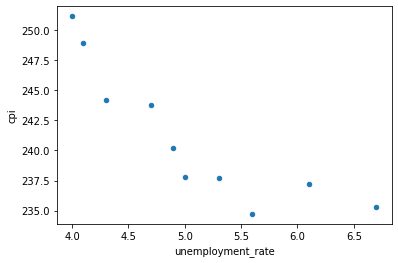

In [56]:
import matplotlib.pyplot as plt
# Use merge_ordered() to merge inflation, unemployment with inner join
inflation_unemploy = pd.merge_ordered(inflation, unemployment, left_on = 'date', right_on = 'date', how = 'inner')

# Print inflation_unemploy 
print(inflation_unemploy)

# Plot a scatter plot of unemployment_rate vs cpi of inflation_unemploy
inflation_unemploy.plot(x = 'unemployment_rate', y = 'cpi', kind = 'scatter')
plt.show()

# merge_ordered() caution, multiple columns
When using merge_ordered() to merge on multiple columns, the order is important when you combine it with the forward fill feature. The function sorts the merge on columns in the order provided. In this exercise, we will merge GDP and population data from the World Bank for the Australia and Sweden, reversing the order of the merge on columns. The frequency of the series are different, the GDP values are quarterly, and the population is yearly. Use the forward fill feature to fill in the missing data. Depending on the order provided, the fill forward will use unintended data to fill in the missing values.

The tables gdp and pop have been loaded  
Use merge_ordered() on gdp and pop, merging on columns date and country with the fill feature, save to ctry_date.  

Perform the same merge of gdp and pop, but join on country and date (reverse of step 1) with the fill feature, saving this as date_ctry.

In [57]:
pop = pd.read_csv("pop.csv")
gdp2 = pd.read_csv("gdp2.csv")

In [58]:
# Merge gdp and pop on date and country with fill and notice rows 2 and 3
ctry_date = pd.merge_ordered(gdp2, pop, on = ('date','country'), 
                             fill_method='ffill')

# Print ctry_date
print(ctry_date)

# Merge gdp and pop on country and date with fill
date_ctry = pd.merge_ordered(gdp2, pop, on = ('country', 'date'), 
                             fill_method='ffill')

# Print date_ctry
print(date_ctry)

        date    country           gdp  series_code_x       pop series_code_y
0   1/1/1990  Australia  158051.13240  NYGDPMKTPSAKD  17065100   SP.POP.TOTL
1   1/1/1990     Sweden   79837.84599  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
2   1/1/1991  Australia  156195.95350  NYGDPMKTPSAKD  17284000   SP.POP.TOTL
3   1/1/1991     Sweden   79524.24192  NYGDPMKTPSAKD   8617375   SP.POP.TOTL
4   1/1/1992  Australia  157916.08110  NYGDPMKTPSAKD  17495000   SP.POP.TOTL
5   1/1/1992     Sweden   79390.92175  NYGDPMKTPSAKD   8668067   SP.POP.TOTL
6   1/1/1993  Australia  165097.49510  NYGDPMKTPSAKD  17667000   SP.POP.TOTL
7   1/1/1993     Sweden   75783.58777  NYGDPMKTPSAKD   8718561   SP.POP.TOTL
8   4/1/1990  Australia  158263.58160  NYGDPMKTPSAKD   8718561   SP.POP.TOTL
9   4/1/1990     Sweden   80582.28597  NYGDPMKTPSAKD   8718561   SP.POP.TOTL
10  4/1/1991  Australia  155989.03270  NYGDPMKTPSAKD   8718561   SP.POP.TOTL
11  4/1/1991     Sweden   79073.05901  NYGDPMKTPSAKD   8718561   SP.POP.TOTL

# merge_asof()

merge_asof() will match on the nearest value columns rather than equal values. This brings up an important point - whatever columns you merge on must be sorted.  

pd.merge_asof(visa, ibm, on='date_time',suffixes=('_visa','_ibm'))  

merge_asof() example with direction  
pd.merge_asof(visa, ibm, on=['date_time'],suffixes=('_visa','_ibm'),direction='forward')

**When to use merge_asof()**  
Data sampled from a process  
Developing a training set (no data leakage

# Using merge_asof() to study stocks
You have a feed of stock market prices that you record. You attempt to track the price every five minutes. Still, due to some network latency, the prices you record are roughly every 5 minutes. You pull your price logs for three banks, JP Morgan (JPM), Wells Fargo (WFC), and Bank Of America (BAC). You want to know how the price change of the two other banks compare to JP Morgan. Therefore, you will need to merge these three logs into one table. Afterward, you will use the pandas .diff() method to compute the price change over time. Finally, plot the price changes so you can review your analysis.

The three log files have been loaded for you as tables named jpm, wells, and bac.  

Use merge_asof() to merge jpm (left table) and wells together on the date_time column, where the rows with the nearest times are matched, and with suffixes=('', '_wells'). Save to jpm_wells.  
Use merge_asof() to merge jpm_wells (left table) and bac together on the date_time column, where the rows with the closest times are matched, and with suffixes=('_jpm', '_bac'). Save to jpm_wells_bac.  
Using price_diffs, create a line plot of the close price of JPM, WFC, and BAC only.  

In [59]:
import pandas as pd

jpm = pd.read_csv("jpm.csv")
wells = pd.read_csv("wells.csv")
bac = pd.read_csv("bac.csv")
jpm['date_time'] = pd.to_datetime(jpm['date_time'])
wells['date_time'] = pd.to_datetime(wells['date_time'])
bac['date_time'] = pd.to_datetime(bac['date_time'])
print(jpm.dtypes)
print(wells.dtypes)
print(bac.dtypes)

date_time    datetime64[ns]
close               float64
dtype: object
date_time    datetime64[ns]
close               float64
dtype: object
date_time    datetime64[ns]
close               float64
dtype: object


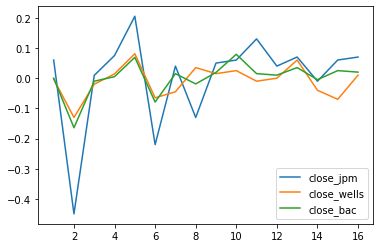

In [60]:
# Use merge_asof() to merge jpm and wells
jpm_wells = pd.merge_asof(jpm, wells, on='date_time', suffixes = ('', '_wells'), direction = 'nearest')


# Use merge_asof() to merge jpm_wells and bac
jpm_wells_bac = pd.merge_asof(jpm_wells, bac, on='date_time', suffixes = ('_jpm', '_bac'), direction = 'nearest')


# Compute price diff
price_diffs = jpm_wells_bac.diff()

# Plot the price diff of the close of jpm, wells and bac only
price_diffs.plot(y=['close_jpm', 'close_wells', 'close_bac'])
plt.show()

# Using merge_asof() to create dataset
The merge_asof() function can be used to create datasets where you have a table of start and stop dates, and you want to use them to create a flag in another table. You have been given gdp, which is a table of quarterly GDP values of the US during the 1980s. Additionally, the table recession has been given to you. It holds the starting date of every US recession since 1980, and the date when the recession was declared to be over. Use merge_asof() to merge the tables and create a status flag if a quarter was during a recession. Finally, to check your work, plot the data in a bar chart.  

The tables gdp and recession have been loaded for you.  

Using merge_asof(), merge gdp and recession on date, with gdp as the left table. Save to the variable gdp_recession.  
Create a list using a list comprehension and a conditional expression, named is_recession, where for each row if the gdp_recession['econ_status'] value is equal to 'recession' then enter 'r' else 'g'.  
Using gdp_recession, plot a bar chart of gdp versus date, setting the color argument equal to is_recession.  

In [61]:
gdp3 = pd.read_csv('gdp3.csv')
recession = pd.read_csv('recession.csv')
gdp3['date'] = pd.to_datetime(gdp3['date'])
recession['date'] = pd.to_datetime(recession['date'])


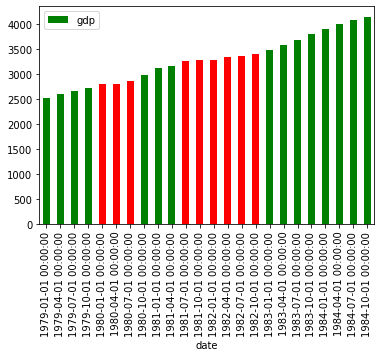

In [62]:
# Merge gdp and recession on date using merge_asof()
gdp_recession = pd.merge_asof(gdp3, recession, on = 'date')

# Create a list based on the row value of gdp_recession['econ_status']
is_recession = ['r' if s=='recession' else 'g' for s in gdp_recession['econ_status']]


# Plot a bar chart of gdp_recession
gdp_recession.plot(kind='bar', y='gdp', x='date', color=is_recession, rot=90)
plt.show()

- merge_asof()
  - used to do fuzzy matching of dates between tables
  - can use function to select the first row in theright table whose key column is greater or equal to the left's
  - after matching 2 tables, if there are missing values at the top of the table from the right table, this can fill them in
- both
  - set suffixes
  - use on ordered or time series data
- merge_ordered()
  - allows for right merge
  - it it cannot match rows exactly it can use forward fill to interpolate the data

# Selecting data with .query()

The query() method accepts an input string that it will use to select rows to return from the table.  

## using and, or
stocks.query('nike >= 90')  
stocks.query('nike > 90 and disney < 140')  
stocks.query('nike > 96 or disney < 98')  

## using .query to select text
stocks_long.query('stock=="disney" or (stock=="nike" and close < 90)')

# Explore financials with .query()
You have been given a table of financial data from some popular social network companies called social_fin. All of the values are in thousands of US dollars.  

Use the .query() method and the console to explore social_fin and select the True statement.  

In [69]:
social_fin = pd.read_csv('social_fin.csv')
print(social_fin.dtypes)

financial    object
company      object
year          int64
value         int64
dtype: object


In [70]:
social_fin.query('value > 50000000' )

,financial,company,year,value
5,total_revenue,facebook,2019,70697000
7,gross_profit,facebook,2019,57927000
20,total_revenue,facebook,2018,55838000


In [72]:
social_fin.query('company == "facebook"')

,financial,company,year,value
5,total_revenue,facebook,2019,70697000
6,cost_of_revenue,facebook,2019,12770000
7,gross_profit,facebook,2019,57927000
8,operating_expenses,facebook,2019,33941000
9,net_income,facebook,2019,18485000
20,total_revenue,facebook,2018,55838000
21,cost_of_revenue,facebook,2018,9355000
22,gross_profit,facebook,2018,46483000
23,operating_expenses,facebook,2018,21570000
24,net_income,facebook,2018,22112000


In [74]:
social_fin.query('value < 0 and financial == "net_income"')

,financial,company,year,value
14,net_income,snap,2019,-1033660
29,net_income,snap,2018,-1255911
34,net_income,twitter,2017,-108063
44,net_income,snap,2017,-3445066
49,net_income,twitter,2016,-456873


In [75]:
social_fin.query('financial == "gross_profit" and value > 100000')

,financial,company,year,value
2,gross_profit,twitter,2019,2322288
7,gross_profit,facebook,2019,57927000
12,gross_profit,snap,2019,819696
17,gross_profit,twitter,2018,2077362
22,gross_profit,facebook,2018,46483000
27,gross_profit,snap,2018,381581
32,gross_profit,twitter,2017,1582057
37,gross_profit,facebook,2017,35199000
42,gross_profit,snap,2017,107487
47,gross_profit,twitter,2016,1597379


# Subsetting rows with .query()
In this exercise, you will revisit GDP and population data for Australia and Sweden from the World Bank and expand on it using the .query() method. You'll merge the two tables and compute the GDP per capita. Afterwards, you'll use the .query() method to sub-select the rows and create a plot. Recall that you will need to merge on multiple columns in the proper order.  

The tables gdp and pop have been loaded for you.  

Use merge_ordered() on gdp and pop on columns country and date with the fill feature, save to gdp_pop and print.  

Add a column named gdp_per_capita to gdp_pop that divides gdp by pop.  

In [80]:
# Merge gdp and pop on date and country with fill
gdp_pop = pd.merge_ordered(gdp2, pop, on = ('country','date'), 
                             fill_method='ffill')

print(gdp_pop.dtypes)



date              object
country           object
gdp              float64
series_code_x     object
pop                int64
series_code_y     object
dtype: object


In [82]:
# Add a column named gdp_per_capita to gdp_pop that divides the gdp by pop
gdp_pop['gdp_per_capita'] = gdp_pop['gdp'] / gdp_pop['pop']

Pivot gdp_pop so values='gdp_per_capita', index='date', and columns='country', save as gdp_pivot.

In [87]:
# Pivot table of gdp_per_capita, where index is date and columns is country
gdp_pivot = gdp_pop.pivot_table('gdp_per_capita', 'date', 'country')

country
Australia    float64
Sweden       float64
dtype: object


Use .query() to select rows from gdp_pivot where date is greater than equal to 1991-01-01". Save as recent_gdp_pop.

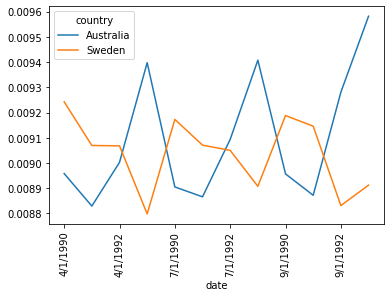

In [89]:
# Select dates equal to or greater than 1991-01-01
recent_gdp_pop = gdp_pivot.query('date >= "1991-01-01"')

# Plot recent_gdp_pop
recent_gdp_pop.plot(rot=90)
plt.show()

# Reshaping data with .melt()
The melt method will allow us to unpivot our dataset - move from wide to long data
social_fin_tall = social_fin.melt(id_vars=['financial','company'])


# Melting with value_vars

value_vars argument controls which columns are unpivoted.   
social_fin_tall = social_fin.melt(id_vars=['financial','company'],value_vars=['2018','2017'])

# Melting with column names

The var_name argument will allow us to set the name of the year column in the output.  
Similarly, the value_name argument will allow us to set the name of the value column in the output.  

social_fin_tall = social_fin.melt(id_vars=['financial','company'],
                                value_vars=['2018','2017'],
                                var_name=['year'], 
                                value_name='dollars')

In [94]:
inflation2 = pd.read_csv('inflation2.csv')
print(inflation2[:5])

  country    indicator  2017  2018  2019
0  Brazil  Inflation %  3.45  3.66  3.73
1  Canada  Inflation %  1.60  2.27  1.95
2  France  Inflation %  1.03  1.85  1.11
3   India  Inflation %  2.49  4.86  7.66


In [97]:
inflation2.melt(id_vars = ['country', 'indicator'], var_name = 'year', value_name = 'annual')

,country,indicator,year,annual
0,Brazil,Inflation %,2017,3.45
1,Canada,Inflation %,2017,1.60
2,France,Inflation %,2017,1.03
3,India,Inflation %,2017,2.49
4,Brazil,Inflation %,2018,3.66
5,Canada,Inflation %,2018,2.27
6,France,Inflation %,2018,1.85
7,India,Inflation %,2018,4.86
8,Brazil,Inflation %,2019,3.73
9,Canada,Inflation %,2019,1.95


# Using .melt() to reshape government data
The US Bureau of Labor Statistics (BLS) often provides data series in an easy-to-read format - it has a separate column for each month, and each year is a different row. Unfortunately, this wide format makes it difficult to plot this information over time. In this exercise, you will reshape a table of US unemployment rate data from the BLS into a form you can plot using .melt(). You will need to add a date column to the table and sort by it to plot the data correctly.  
  
The unemployment rate data has been loaded for you in a table called ur_wide. You are encouraged to view the table in the console before beginning the exercise.  

Use .melt() to unpivot all of the columns of ur_wide except year and ensure that the columns with the months and values are named month and unempl_rate, respectively. Save the result as ur_tall.  
Add a column to ur_tall named date which combines the year and month columns as year-month format into a larger string, and converts it to a date data type.  
Sort ur_tall by date and save as ur_sorted.  
Using ur_sorted, plot unempl_rate on the y-axis and date on the x-axis.  

In [98]:
ur_wide = pd.read_csv('ur_wide.csv')

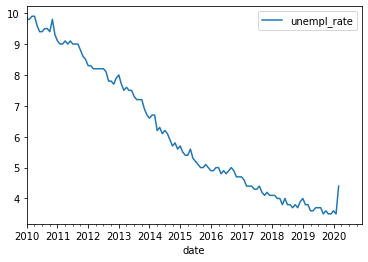

In [107]:
# unpivot everything besides the year column
ur_tall = ur_wide.melt(id_vars = ['year'], var_name = 'month', value_name = 'unempl_rate')


# Create a date column using the month and year columns of ur_tall
ur_tall['date'] = pd.to_datetime(ur_tall['year'].astype(str) + '-' + ur_tall['month'].astype(str))

# Sort ur_tall by date in ascending order
ur_sorted = ur_tall.sort_values('date')

# Plot the unempl_rate by date
ur_sorted.plot(x = 'date', y = 'unempl_rate')
plt.show()

# Using .melt() for stocks vs bond performance
It is widespread knowledge that the price of bonds is inversely related to the price of stocks. In this last exercise, you'll review many of the topics in this chapter to confirm this. You have been given a table of percent change of the US 10-year treasury bond price. It is in a wide format where there is a separate column for each year. You will need to use the .melt() method to reshape this table.  

Additionally, you will use the .query() method to filter out unneeded data. You will merge this table with a table of the percent change of the Dow Jones Industrial stock index price. Finally, you will plot data.  

The tables ten_yr and dji have been loaded for you.  

Use .melt() on ten_yr to unpivot everything except the metric column, setting var_name='date' and value_name='close'. Save the result to bond_perc.  
Using the .query() method, select only those rows were metric equals 'close', and save to bond_perc_close.  
Use merge_ordered() to merge dji (left table) and bond_perc_close on date with an inner join, and set suffixes equal to ('_dow', '_bond'). Save the result to dow_bond.  
Using dow_bond, plot only the Dow and bond values.  

In [108]:
ten_yr = pd.read_csv('ten_yr.csv')
dji = pd.read_csv('dji.csv')

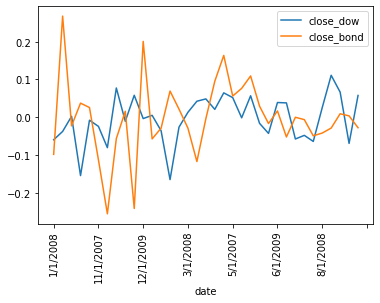

In [114]:
# Use melt on ten_yr, unpivot everything besides the metric column
bond_perc = ten_yr.melt(id_vars = ['metric'], var_name = ['date'], value_name = 'close')

# Use query on bond_perc to select only the rows where metric=close
bond_perc_close = bond_perc.query('metric == "close"')


# Merge (ordered) dji and bond_perc_close on date with an inner join
dow_bond = pd.merge_ordered(dji, bond_perc_close, on = 'date', how = 'inner', suffixes = ['_dow', '_bond'] )


# Plot only the close_dow and close_bond columns
dow_bond.plot(y = ['close_dow', 'close_bond'], x = 'date' , rot=90)
plt.show()

The plot confirms that the bond and stock prices are inversely correlated. Often as the price of stocks increases, the price for bonds decreases.